<a href="https://colab.research.google.com/github/graphmen/Group-Seven/blob/main/Packages_Numpy_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In this section, we will learn about a few important packages including

1. Pandas
2. **Numpy**
3. Scipy
4. Xarray

## Numpy

We will learn how to use numpy to:
1. create arrays


### Creating arrays

In Numpy, everything is an array

In [5]:
#import numpy 
import numpy as np

# create a 1D array

x1 = np.array(['Sokoto','Kano','Bauchi'])  # from list
x2 = np.array((1,2,3,4,5))  # tuple

# 2 D arrays
x3 = np.array([['Sokoto','Kano','Bauchi','Benue','Lokoja','Abuja','Lagos','Ibadan'],(1,2,3,4,5,6,7,8)])   

In [8]:
# check the sizes and dimensions of numpy arrays

print(x3.size)
print(x3.shape)
print(x3.ndim)

2


In [10]:
# indexing is done very much like in lists

x3[0][1]
x3[0,1]

# what does x3[0,-1] give you?

'Kano'

In [15]:
# we can also slice the array 
x3[0][1:4]
x3[0][0:-1:2]
x3[0][:5]
x3[0][5:]

x3[0:2,0:2]

array([['Sokoto', 'Kano'],
       ['1', '2']], dtype='<U21')

In [18]:
# Numpy arrays can be converted from one dimension to another

x3[0].reshape(2,4)
x3[1].reshape(2,-1)   # -1 means unknown dimension, hence numpy will calculate it for you

x3.reshape(-1)

array(['Sokoto', 'Kano', 'Bauchi', 'Benue', 'Lokoja', 'Abuja', 'Lagos',
       'Ibadan', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='<U21')

In [30]:
# special arrays

np.zeros((3,3))
np.ones((3,3))


w = np.zeros((3,3))
#lets populate this in a loop
for i in np.arange(3):
  for j in np.arange(3):
    w[i][j] = np.random.randint(9)
w

# or we can just generate it directly
np.random.rand(3,3)

array([[0.10412791, 0.03098811, 0.47445816],
       [0.50783503, 0.50180416, 0.09720311],
       [0.70555651, 0.08517363, 0.97078901]])

In [25]:
# special arrays

np.zeros((3,3))
np.ones((3,3))


w = np.zeros((3,3))
#lets populate this in a loop
for i in np.arange(3):
  for j in np.arange(3):
    w[i][j] = np.random.randint(9)

# or we can just generate it directly
np.random.rand(3,3)

# Package

In this section, we will learn about a few important packages including

1. Pandas
2. Numpy
3. **Scipy**
4. Xarray

## Scipy

Scipy (Scientific Programming) is based on Numpy. It provides robust functions for statistical analysis. 

The capabilities of Scipy as it relates to statistical tests can be found here  https://docs.scipy.org/doc/scipy/reference/stats.html

In [31]:
# import scipy

import scipy as sp
from scipy.constants import *


In [34]:
# Scipy has a list of some important constants
sp.constants.find()
sp.constants.physical_constants['Angstrom star']

sp.constants.convert_temperature(np.array([-40, 40]), 'Fahrenheit', 'Celsius') # convert from one temperature scale to another

array([-40.        ,   4.44444444])

In [44]:
# Interpolation can also be done in scipy
x = [0.1,0.2,0.4,0.5]
y = np.exp(x)
y


f = sp.interpolate.interp1d(x, y,kind='linear')  # kind =  ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’
f(0.3)-np.exp(0.3)
f(0.2)-np.exp(0.2)

-2.220446049250313e-16

In [46]:
# the statistical functions in scipy are top-notch

# let's find the correlation and regression between two signals

slope, intercept, r, p, se = sp.stats.linregress(x, y)
slope, intercept, r, p, se

slope, intercept, low_slope, high_slope = sp.stats.theilslopes(x,y)
slope, intercept, low_slope, high_slope

(0.7377436730101763,
 -0.700833194477505,
 0.6373625506943749,
 0.8603494526739095)

# Package

In this section, we will learn about a few important packages including

1. Pandas
2. Numpy
3. Scipy
4. **Xarray**

Xarray is the package for geoscientists, meteorologists, and everyone who works with geospatial data. 

In this module, we will learn how to use xarray for

1. opening netcdf documents
2. subsetting gridded data 

Importing data is easy 

Let's consider global precipitation data at https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/

In [47]:
!wget "https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/precip.2020.nc"


--2023-03-29 10:08:14--  https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/precip.2020.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59112656 (56M) [application/x-netcdf]
Saving to: ‘precip.2020.nc’

precip.2020.nc      100%[===================>]  56.37M  14.4MB/s    in 3.9s    

2023-03-29 10:08:19 (14.4 MB/s) - ‘precip.2020.nc’ saved [59112656/59112656]



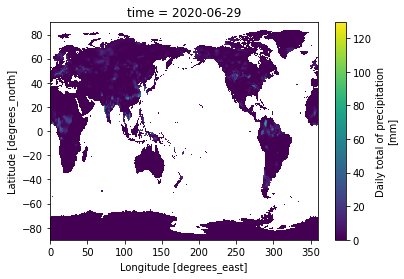

In [53]:
import xarray as xr

ff = xr.open_dataset("precip.2020.nc")
ff.precip.isel(time=180).plot()
ff

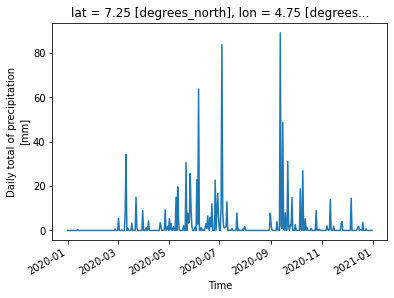

In [54]:
# we can select just one location too
xa = ff["precip"].sel(lon=4.5, lat=7.2, method="nearest")
xa.plot()

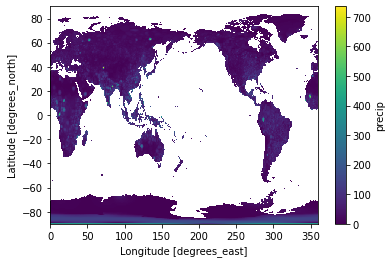

In [56]:
# Most analysis done in Pandas can be done with xarray

ff.mean(dim='time').precip.plot()

ff.max(dim='time').precip.plot()